# Cancer Detection CNN project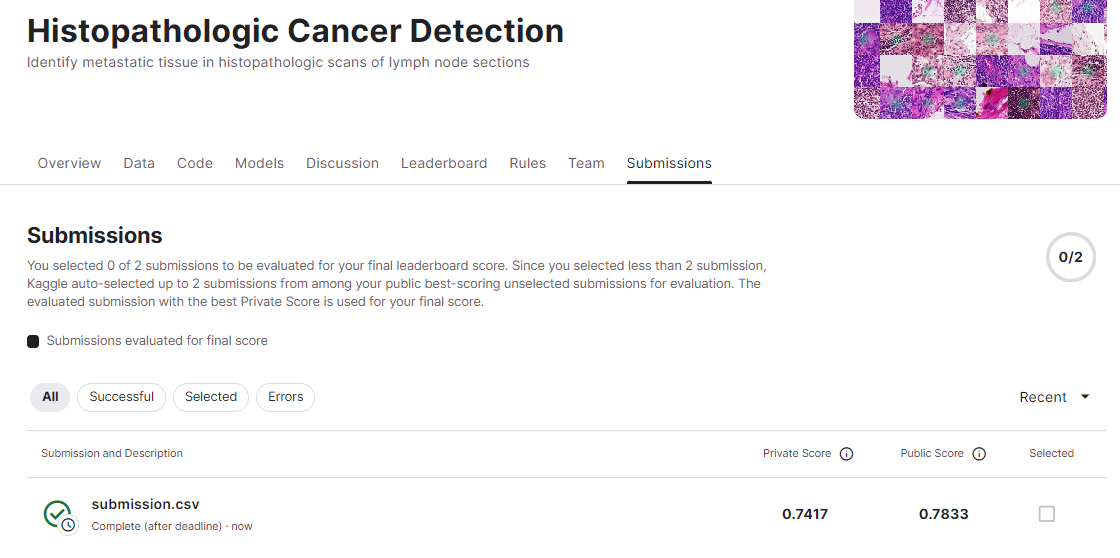

## Problem Statement

For this project, I'll utilize CNN techniques for cancer detection. I'll experiment with various parameters and optimizers to enhance the model's performance.

## Data preprocessing

### Install necessary libraries

In [2]:
!pip install tensorflow

### Import necessary libraries

In [25]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import shutil
import cv2
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import csv
from PIL import Image

### Get subset of the training data and convert the images to .png format

Because the training dataset is extensive, training all of it is challenging. Therefore, I opt to select a subset of the training data while ensuring it remains balanced.

In [99]:
# Set the paths
original_data_folder = "/content/drive/MyDrive/CU_Boulder/dtsa-5511_Introduction to Deep Learning/Histopathologic_Cancer_Detection/histopathologic-cancer-detection/train/"
original_labels_csv = "/content/drive/MyDrive/CU_Boulder/dtsa-5511_Introduction to Deep Learning/Histopathologic_Cancer_Detection/histopathologic-cancer-detection/train_labels.csv"
converted_data_folder = "/content/drive/MyDrive/CU_Boulder/dtsa-5511_Introduction to Deep Learning/Histopathologic_Cancer_Detection/histopathologic-cancer-detection/converted_train/"
converted_data_folder_0 = "/content/drive/MyDrive/CU_Boulder/dtsa-5511_Introduction to Deep Learning/Histopathologic_Cancer_Detection/histopathologic-cancer-detection/converted_train/0/"
converted_data_folder_1 = "/content/drive/MyDrive/CU_Boulder/dtsa-5511_Introduction to Deep Learning/Histopathologic_Cancer_Detection/histopathologic-cancer-detection/converted_train/1/"

In [ ]:
# Read the original labels CSV file
df_original = pd.read_csv(original_labels_csv)

# Filter our IDs that do not exist in the original data folder
existing_ids = [file_name[:-4] for file_name in os.listdir(original_data_folder)]
df_original = df_original[df_original['id'].isin(existing_ids)]

# Count occurrences of each class
class_counts = df_original['label'].value_counts()

# Choose a balanced number of samples
min_count = min(class_counts)
num_samples_per_class = min_count // 4

# Create the new data folders if they don't exist
os.makedirs(converted_data_folder, exist_ok=True)
os.makedirs(converted_data_folder_0, exist_ok=True)
os.makedirs(converted_data_folder_1, exist_ok=True)

# Convert .tif images to .png format and create the dataset
for class_label in [0, 1]:
    class_df = df_original[df_original['label'] == class_label].sample(num_samples_per_class, random_state=2024)
    new_data_folder = converted_data_folder_0 if class_label == 0 else converted_data_folder_1
    for index, row in class_df.iterrows():
        file_name = row['id'] + '.tif'
        source_path = os.path.join(original_data_folder, file_name)
        destination_path = os.path.join(new_data_folder, row['id'] + '.png')
        # Convert .tif to .png using OpenCV
        image = cv2.imread(source_path)
        cv2.imwrite(destination_path, image)

print("The images are picked, copied and converted")

I need to remove the corrupted images.

In [86]:
import os
from PIL import Image

# Directory containing the images
image_directory = converted_data_folder

# List to store paths of corrupted images
corrupted_images = []

# Iterate over all directories and subdirectories
for root, dirs, files in os.walk(image_directory):
    # Iterate over all files in the current directory
    for filename in files:
        # Construct the full file path
        image_path = os.path.join(root, filename)
        try:
            # Attempt to open the image file
            with Image.open(image_path) as img:
                # If successful, do nothing
                pass
        except Exception as e:
            # If an error occurs (e.g., the image is corrupted), add the file path to the list
            print(f"Corrupted image: {image_path}")
            print(f"Error: {e}")
            corrupted_images.append(image_path)

# Remove all corrupted images
for image_path in corrupted_images:
    try:
        # Attempt to remove the file
        os.remove(image_path)
        print(f"Removed: {image_path}")
    except Exception as e:
        # Print an error message if the file could not be removed
        print(f"Error removing {image_path}: {e}")

### Convert the test images to .png format

In [4]:
original_test_data_folder = "/content/drive/MyDrive/CU_Boulder/dtsa-5511_Introduction to Deep Learning/Histopathologic_Cancer_Detection/histopathologic-cancer-detection/test/"
converted_test_data_folder = "/content/drive/MyDrive/CU_Boulder/dtsa-5511_Introduction to Deep Learning/Histopathologic_Cancer_Detection/histopathologic-cancer-detection/converted_test/"

In [130]:
# Create the new data folder if it doesn't exist
os.makedirs(converted_test_data_folder, exist_ok=True)

# Iterate over each file in the input folder
for filename in os.listdir(original_test_data_folder):
    if filename.endswith(".tif"):
        # Read the .tif image
        tif_image_path = os.path.join(original_test_data_folder, filename)
        destination_path = os.path.join(converted_test_data_folder, os.path.splitext(filename)[0] + ".png")
        # Convert .tif to .png using OpenCV
        image = cv2.imread(tif_image_path)
        if image is not None:
            cv2.imwrite(destination_path, image)
        else:
            print(f"Failed to convert: {tif_image_path}")

print("Conversion completed.")

Failed to convert: /content/drive/MyDrive/CU_Boulder/dtsa-5511_Introduction to Deep Learning/Histopathologic_Cancer_Detection/histopathologic-cancer-detection/test/b24dd7dd09e783955ee4e9a7818481d6b4cd1bf2.tif
Failed to convert: /content/drive/MyDrive/CU_Boulder/dtsa-5511_Introduction to Deep Learning/Histopathologic_Cancer_Detection/histopathologic-cancer-detection/test/b24fdc70b9a51017a8e66df1b8ccfa5c5e10ed3d.tif
Failed to convert: /content/drive/MyDrive/CU_Boulder/dtsa-5511_Introduction to Deep Learning/Histopathologic_Cancer_Detection/histopathologic-cancer-detection/test/b24de9ac61d83ddcd01b10b63770030da33e43f5.tif
Failed to convert: /content/drive/MyDrive/CU_Boulder/dtsa-5511_Introduction to Deep Learning/Histopathologic_Cancer_Detection/histopathologic-cancer-detection/test/b24d2611bb3c53372a448cb1b066987c210dcc70.tif
Failed to convert: /content/drive/MyDrive/CU_Boulder/dtsa-5511_Introduction to Deep Learning/Histopathologic_Cancer_Detection/histopathologic-cancer-detection/test/

The following images are corrupted and we will try to convet them again.

In [5]:
# Failed to convert filenames
filenames = ['b24dd7dd09e783955ee4e9a7818481d6b4cd1bf2.tif','b24fdc70b9a51017a8e66df1b8ccfa5c5e10ed3d.tif',
             'b24de9ac61d83ddcd01b10b63770030da33e43f5.tif','b24d2611bb3c53372a448cb1b066987c210dcc70.tif',
             'b249d54abd567198cb054465adc25b1e207ea818.tif','b24d585997ebeb88a47e3614d7971c42a3fca161.tif',
             '6b359ce7274933a5391385c02bc7220fe74f20e2.tif','6b3915d3717e80a9629230b5d2b094b26c4f5a00.tif',
             '6b3acd84218d660fd78fd0f5875e668d27530e81.tif','6b34683e56087e300bd7b00a8bc92df3b1027641.tif',
             '6b3993a29333f2de3928c3d3f49825535b574371.tif','6b32ed56e1958da53c9d292a5c2e9653202e95a3.tif',
             '6573f27b6cd26f7ff6f23c11386a2a33470bd9e4.tif','65736b78f7f885c8c3bc6e88664b4428c6421ff7.tif',
             '6575268356d01d053bbdc6e2cb1325efab940f01.tif','6570bad525ae63abe46cad6a7559765afdc1f90c.tif',
             '6575a96644a66860039f367f5fbc2059b71cd2f9.tif','39c62fd8cc76fe28cc3a16787f192e2f48f7f31a.tif',
             '39c5e29c436bdc38b3c7dd18f301a4b2a837f921.tif','39c74bc299b478b985cc4ae321c5a5c08614293c.tif',
             '39c8a7e15221a8167f36d76e19224ea52d0efc15.tif'
             ]

# Iterate over each file in the input folder
for filename in filenames:
    if filename.endswith(".tif"):
        # Read the .tif image
        tif_image_path = os.path.join(original_test_data_folder, filename)
        destination_path = os.path.join(converted_test_data_folder, os.path.splitext(filename)[0] + ".png")
        # Convert .tif to .png using OpenCV
        image = cv2.imread(tif_image_path)
        if image is not None:
            cv2.imwrite(destination_path, image)
        else:
            print(f"Failed to convert: {tif_image_path}")

print("Conversion completed.")

Failed to convert: /content/drive/MyDrive/CU_Boulder/dtsa-5511_Introduction to Deep Learning/Histopathologic_Cancer_Detection/histopathologic-cancer-detection/test/b24dd7dd09e783955ee4e9a7818481d6b4cd1bf2.tif
Failed to convert: /content/drive/MyDrive/CU_Boulder/dtsa-5511_Introduction to Deep Learning/Histopathologic_Cancer_Detection/histopathologic-cancer-detection/test/b24fdc70b9a51017a8e66df1b8ccfa5c5e10ed3d.tif
Failed to convert: /content/drive/MyDrive/CU_Boulder/dtsa-5511_Introduction to Deep Learning/Histopathologic_Cancer_Detection/histopathologic-cancer-detection/test/b24de9ac61d83ddcd01b10b63770030da33e43f5.tif
Failed to convert: /content/drive/MyDrive/CU_Boulder/dtsa-5511_Introduction to Deep Learning/Histopathologic_Cancer_Detection/histopathologic-cancer-detection/test/b24d2611bb3c53372a448cb1b066987c210dcc70.tif
Failed to convert: /content/drive/MyDrive/CU_Boulder/dtsa-5511_Introduction to Deep Learning/Histopathologic_Cancer_Detection/histopathologic-cancer-detection/test/

I need to remove the corrupted images.

In [ ]:
import os
from PIL import Image

# Directory containing the images
image_directory = converted_test_data_folder

# List to store paths of corrupted images
corrupted_images = []

# Iterate over all files in the directory
for filename in os.listdir(image_directory):
    # Construct the full file path
    image_path = os.path.join(image_directory, filename)
    try:
        # Attempt to open the image file
        with Image.open(image_path) as img:
            # If successful, do nothing
            pass
    except Exception as e:
        # If an error occurs (e.g., the image is corrupted), add the file path to the list
        print(f"Corrupted image: {image_path}")
        print(f"Error: {e}")
        corrupted_images.append(image_path)

# Remove all corrupted images
for image_path in corrupted_images:
    try:
        # Attempt to remove the file
        os.remove(image_path)
        print(f"Removed: {image_path}")
    except Exception as e:
        # Print an error message if the file could not be removed
        print(f"Error removing {image_path}: {e}")

### Data upload to Kaggle

I have uploaded the resized images to Kaggle. You can get the uploaded data here.
[histopathologic-cancer-detection-resized](https://www.kaggle.com/datasets/stevenli198802/histopathologic-cancer-detection-resized)

### Data download from Kaggle

In [1]:
!kaggle datasets download -d stevenli198802/histopathologic-cancer-detection-resized

Dataset URL: https://www.kaggle.com/datasets/stevenli198802/histopathologic-cancer-detection-resized
License(s): other
 99% 1.37G/1.38G [00:23<00:00, 96.9MB/s]
100% 1.38G/1.38G [00:23<00:00, 61.9MB/s]


In [4]:
!unzip histopathologic-cancer-detection-resized.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: converted_test/converted_test/fdcab2e94c12679fd3efdd243d082891b909a1ac.png  
  inflating: converted_test/converted_test/fdcb0903020c0630fd7fef6548939778a520b553.png  
  inflating: converted_test/converted_test/fdcb9e36d61f5e044b170e413d2097d86cbcd325.png  
  inflating: converted_test/converted_test/fdcc357640b38324f62df700078a87b66af846ed.png  
  inflating: converted_test/converted_test/fdcc97020d3e40eb29a46160bf11fe25601348e9.png  
  inflating: converted_test/converted_test/fdcc97708ff317e4a9e49f949b1defe2cfe2b90e.png  
  inflating: converted_test/converted_test/fdcd1a9ab4007024386f887776281bc977cbb001.png  
  inflating: converted_test/converted_test/fdcf42c4b744e9d61ba9209c3a0dbebb572bcdb2.png  
  inflating: converted_test/converted_test/fdd2e44d0e55f9a08abee5639f76d1dbd17a8401.png  
  inflating: converted_test/converted_test/fdd343fbbbb0157708d641517ca40f49226775e2.png  
  inflating: converted_test/converted_test/fdd4f040c217d8ce821597905

### Check the data balance

In [5]:
converted_data_folder = "/content/converted_train/converted_train"

In [6]:
IMAGE_SIZE = 96
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [7]:
# Load all images from directory into memory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    converted_data_folder,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_split=None
)

print("Dataset created.")

Found 4505 files belonging to 2 classes.
Dataset created.


In [8]:
class_names = dataset.class_names
class_names

['0', '1']

We observed that the data is balanced.

Label 0 count: 2252
Label 1 count: 2253


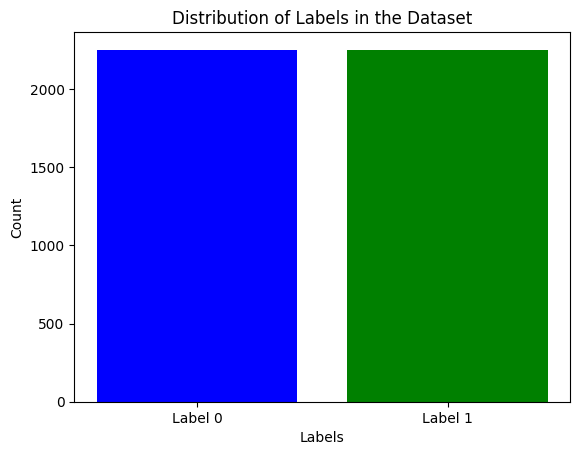

In [9]:
# Initialize variables to count the occurrences of each label
label_counts = {0: 0, 1: 0}

# Count occurrences of each label in the dataset
count = 0
for images, labels in dataset:
    for label in labels:
        label_scalar = label.numpy()
        label_counts[label_scalar] += 1

print("Label 0 count:", label_counts[0])
print("Label 1 count:", label_counts[1])

# Plotting
labels = ['Label 0', 'Label 1']
counts = [label_counts[0], label_counts[1]]

plt.bar(labels, counts, color=['blue', 'green'])
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels in the Dataset')
plt.show()

### Check some sample data

We can take some sample images to check if they work well

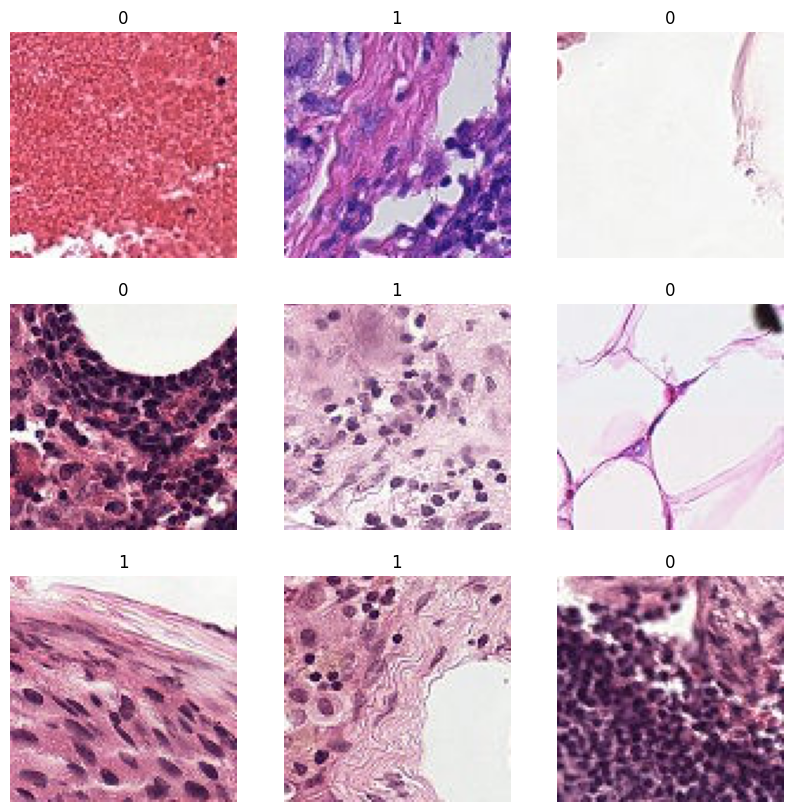

In [10]:
plt.figure(figsize = (10, 10))
for image_batch, label_batch in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(label_batch[i].numpy())
    plt.axis("off")


## Model creation

### Dataset Partition

In [11]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed = 2024)

  train_size = int(train_split * len(ds))
  val_size = int(val_split * len(ds))
  test_size = int(test_split * len(ds))

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [12]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [13]:
len(train_ds)

112

In [14]:
len(val_ds)

14

In [15]:
len(test_ds)

15

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

### Data resizing and rescaling

In [17]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [18]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

### Create models with different parameters

Epoch 1/50
112/112 [==============================] - 39s 308ms/step - loss: 0.5508 - accuracy: 0.7176 - val_loss: 0.5665 - val_accuracy: 0.7528
Epoch 2/50
112/112 [==============================] - 26s 233ms/step - loss: 0.4803 - accuracy: 0.7859 - val_loss: 0.4507 - val_accuracy: 0.8073
Epoch 3/50
112/112 [==============================] - 24s 217ms/step - loss: 0.4710 - accuracy: 0.7856 - val_loss: 0.4408 - val_accuracy: 0.8073
Epoch 4/50
112/112 [==============================] - 25s 221ms/step - loss: 0.4592 - accuracy: 0.7951 - val_loss: 0.4317 - val_accuracy: 0.8095
Epoch 5/50
112/112 [==============================] - 25s 220ms/step - loss: 0.4570 - accuracy: 0.7951 - val_loss: 0.5770 - val_accuracy: 0.7415
Epoch 6/50
112/112 [==============================] - 25s 223ms/step - loss: 0.4529 - accuracy: 0.8051 - val_loss: 0.4421 - val_accuracy: 0.8050
Epoch 7/50
112/112 [==============================] - 27s 239ms/step - loss: 0.4497 - accuracy: 0.7962 - val_loss: 0.4283 - val_ac

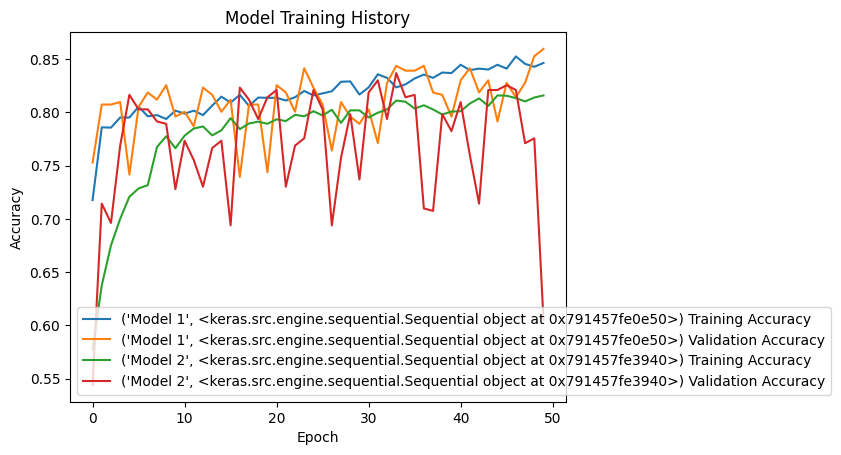

In [19]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Define models and histories
models_list = []
histories = []

# Model 1
model1 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models_list.append(("Model 1", model1))

# Model 2 (Different architecture)
model2 = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
models_list.append(("Model 2", model2))

# Train the models
for model_name, model in models_list:
    history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)
    histories.append(history)

# Evaluate the models
results = []
for model_name, model in models_list:
    loss, accuracy = model.evaluate(test_ds)
    results.append((model_name, loss, accuracy))

# Display results
for model_name, loss, accuracy in results:
    print(f"Model: {model_name}, Test Loss: {loss}, Test Accuracy: {accuracy}")

# Plot training history

for model_name, history in zip(models_list, histories):
    plt.plot(history.history['accuracy'], label=f'{model_name} Training Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{model_name} Validation Accuracy')

plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

We can see that model1 outperforms model2, displaying a consistently higher accuracy. Therefore, we will utilize model1 for predicting our test data.

### Do some sample predictions

In [20]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[int(predictions[0] > 0.5)]  # Threshold of 0.5 for binary classification
    confidence = round(100 * (predictions[0][0] if predicted_class == class_names[1] else 1 - predictions[0][0]), 2)

    return predicted_class, confidence

1/1 [==============================] - 0s 418ms/step


<ipython-input-20-e827788e1af5>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_names[int(predictions[0] > 0.5)]  # Threshold of 0.5 for binary classification


1/1 [==============================] - 0s 31ms/step


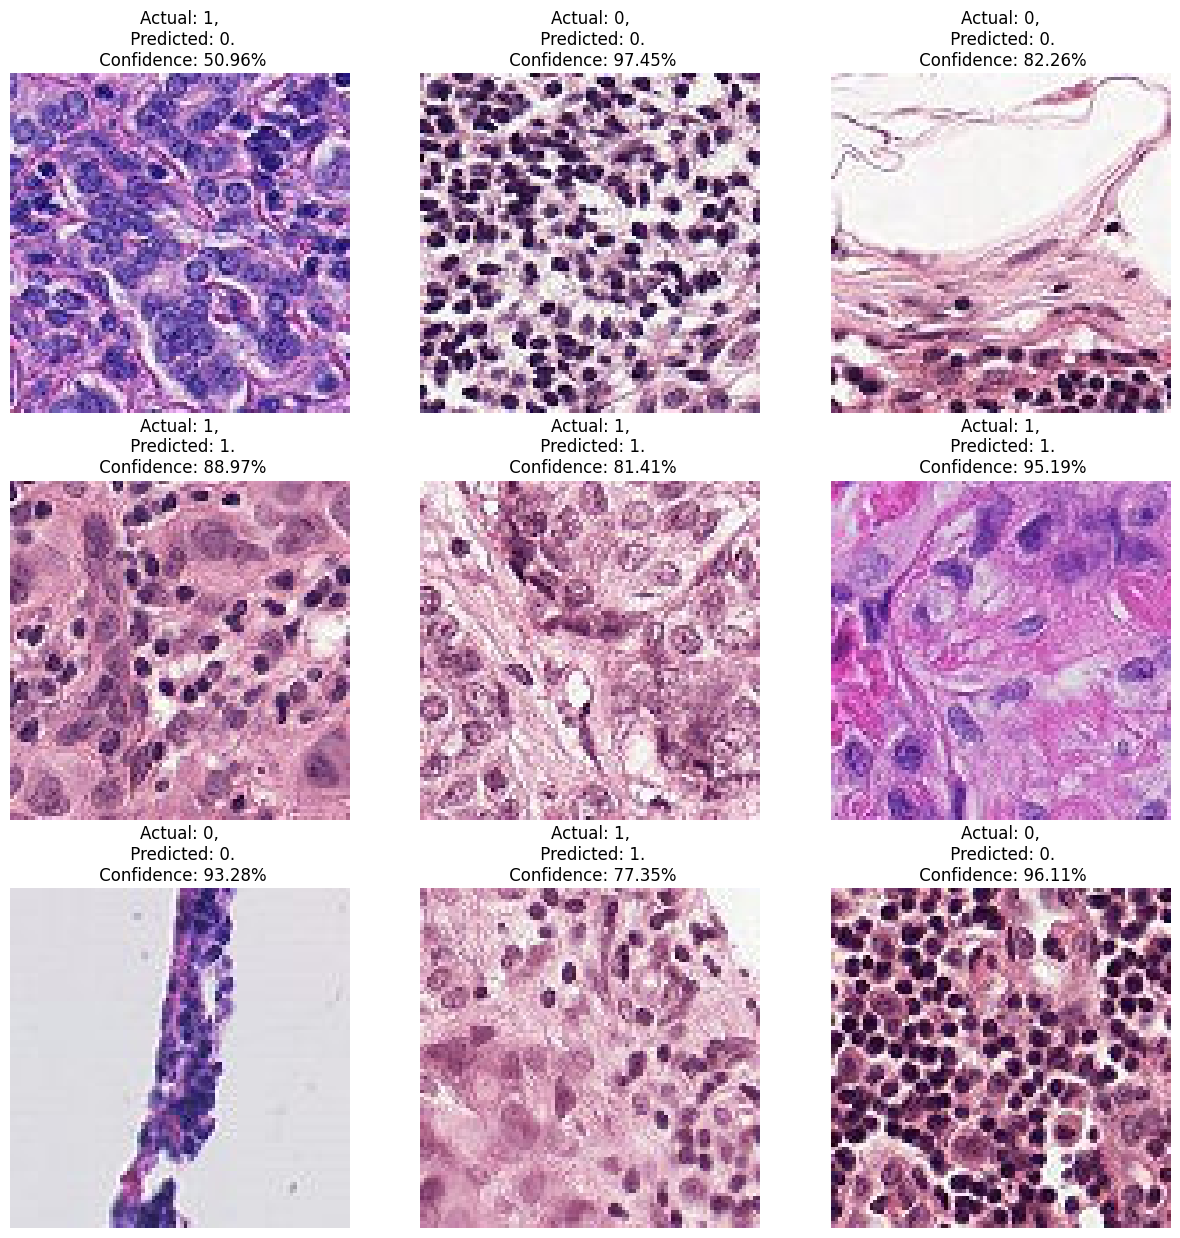

In [22]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))


    predicted_class, confidence = predict(model1, images[i].numpy())
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis('off')


### Cancer detection on our test data

In [29]:
test_image_directory = "/content/converted_test/converted_test"

# List to store predictions
predictions = []

# Iterate over each file in the directory
for filename in os.listdir(test_image_directory):
    if filename.endswith(".png"):  # Adjust file extension as needed
        # Read and preprocess the image
        img_path = os.path.join(test_image_directory, filename)
        img = Image.open(img_path).resize((IMAGE_SIZE, IMAGE_SIZE))  # Resize image if necessary

        # Predict the class label
        label, confidence = predict(model1, img)

        # Append prediction to the list
        predictions.append({"id": os.path.splitext(filename)[0], "label": label})

# Write predictions to a CSV file
output_csv = "submission.csv"
with open(output_csv, mode="w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=["id", "label"])
    writer.writeheader()
    writer.writerows(predictions)

print("Predictions saved to:", output_csv)

1/1 [==============================] - 0s 22ms/step


<ipython-input-20-e827788e1af5>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_names[int(predictions[0] > 0.5)]  # Threshold of 0.5 for binary classification


ストリーミング出力は最後の 5000 行に切り捨てられました。
1/1 [==============================] - 0s 34ms/step
Predictions saved to: submission.csv


### Data submission


As we encountered 21 corrupted images during the conversion from .tif to .png format, we must include these 21 records when submitting our prediction results to Kaggle. The corresponding score can be viewed here.


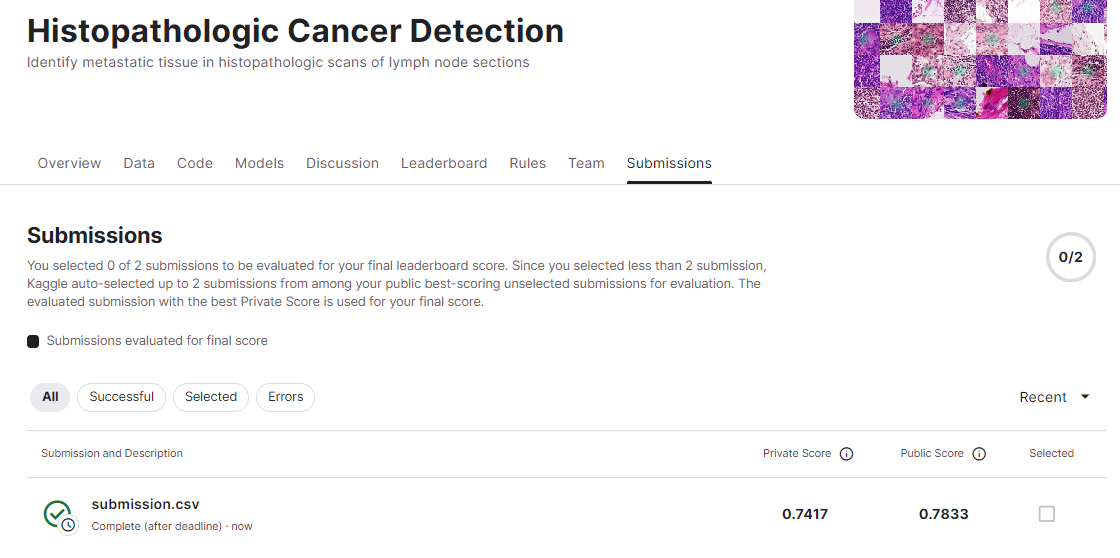

## Conclusion

Due to the extensive size of the dataset, we opted not to utilize the entire training dataset for constructing our models. Consequently, the final score may not be optimal. Nonetheless, our model performs reasonably well, particularly with the Adam optimizer, which exhibits remarkable stability. Given sufficient computing resources, I believe the score could substantially improve.
 Deep learning proves to be an invaluable tool, but its efficacy heavily relies on computational capabilities.